In [2]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Cellular automata & fractal dimension

## Define the automaton

In [3]:
class Cellular1D:
    
    def __init__(self, init_state, rule):
        self.init_state = np.array(init_state)
        self.rule = np.array(rule)
        
        
    def run(self, n_timesteps, window=[4, 2, 1]): # Window [4, 2, 1] interprets the neighborhood as a binary number
        
        """Runs the automaton for `n_timesteps` steps.
        Window 4, 2, 1 inspired by Downey's Think Complexity'"""
        
        self.grid = np.zeros([n_timesteps + 1, self.init_state.shape[0]])
        
        self.grid[0] = self.init_state
        
        for i in range(1, self.grid.shape[0]):
            c_i = np.correlate(self.grid[i - 1], window, mode='same').astype('int') # Cast to int for later indexing
            self.grid[i] = self.rule[::-1][c_i]
        
        return self.grid
    
    
def get_rule(rule):
    
    """Takes a decimal rule name and unpacks it to its binary representation"""
    
    rule = np.array([rule], dtype='uint8')
    
    return np.unpackbits(rule)

In [103]:
def get_dimension(grid):
    
    """Computes fractal dimension of a 1D cellular automaton"""
    
    cells = np.cumsum(grid.sum(axis=1))
    steps = np.arange(grid.shape[0]) + 1
    
    return stats.linregress(np.log(steps), np.log(cells))[0]

## Initialize and plot

In [116]:
# Define hyperparams
RULE = 18
STEPS = 500
WIDTH = 1001
P = .5

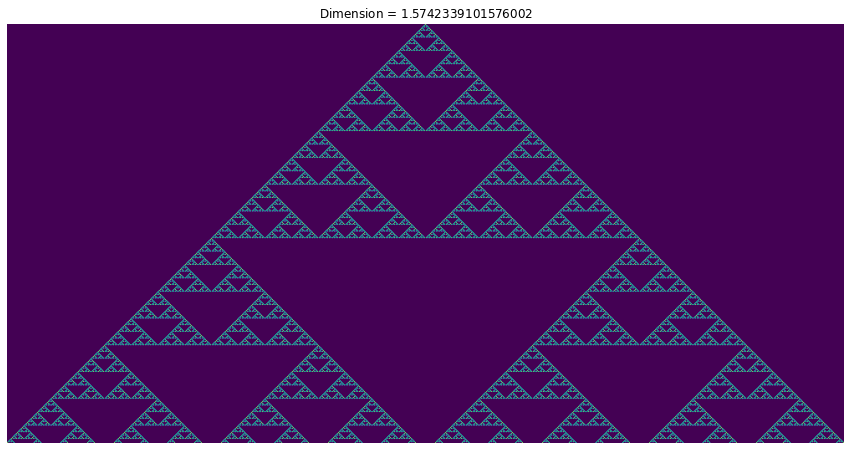

In [119]:
# Define params
init_state = np.zeros(WIDTH)

# init_state = np.random.binomial(1, P, WIDTH)

# Set the middle point to 1
init_state[WIDTH // 2] = 1

rule = get_rule(RULE)

# Initialize the automaton
c1 = Cellular1D(init_state, rule)

grid = c1.run(STEPS)

# Get dimension 
dimension = get_dimension(grid)

# Plot
plt.figure(figsize=(15, 200))
plt.imshow(grid, interpolation=None)
plt.axis('off')
plt.title(f'Dimension = ${dimension}$')
plt.show()